In [1]:
!pip install tensorflow

In [1]:
import tensorflow as tf

In [2]:
tf.version.VERSION

'2.7.0'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import numpy as np

In [5]:
mnist= pd.read_csv("Datasets/MNIST_Train (2).csv")

In [6]:
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
abcd=mnist.iloc[0,1:]

In [8]:
abcd

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

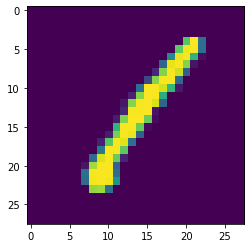

In [9]:
abcd=np.array(mnist.iloc[0,1:])
abcd=abcd.reshape(28,28)
plt.imshow(abcd)

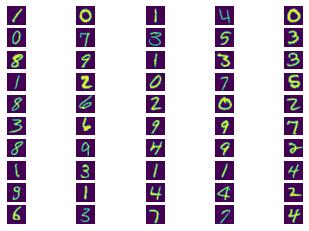

In [10]:
mnist1=mnist.iloc[:,1:786]
mnist1=np.array(mnist1)
for i in range(50): # for 20 images
    plt.subplot(10,5,i+1) 
    plt.imshow(mnist1[i,:].reshape(28,28))
    plt.axis('off')

In [11]:
#building NN model

In [13]:
mnist_x =mnist.iloc[:,1:786]
mnist_y =mnist.iloc[:,0]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
mnist_x_train,mnist_x_test,mnist_y_train,mnist_y_test =train_test_split(mnist_x,mnist_y,test_size=.2,random_state=420)

In [16]:
print(mnist_x_train.shape)
print(mnist_y_train.shape)

(33600, 784)
(33600,)


In [17]:
print(mnist_x_test.shape)
print(mnist_y_test.shape)

(8400, 784)
(8400,)


In [18]:
mnist_x_train =np.array(mnist_x_train)
mnist_x_test =np.array(mnist_x_test) # for tenser flow (NN) your data has to be in arrey format

In [19]:
# normalise the data its not mandatory nut if u normalise the data u get better model

In [20]:
mnist_y_train = np.array(mnist_y_train) #converting y into array format

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation = tf.nn.relu)) # 2ndst layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 3rd layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # output layer 
# the 10 in above last line is not a hyper parameter, it is mapped to number of levels in y

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [22]:
model.fit(mnist_x_train , mnist_y_train , epochs = 50 , validation_split = .2 , batch_size = 100)

Epoch 1/50
269/269 [==============================] - 9s 22ms/step - loss: 2.4125 - accuracy: 0.8309 - val_loss: 0.7034 - val_accuracy: 0.8918
Epoch 2/50
269/269 [==============================] - 5s 19ms/step - loss: 0.4584 - accuracy: 0.9167 - val_loss: 0.4657 - val_accuracy: 0.9176
Epoch 3/50
269/269 [==============================] - 5s 19ms/step - loss: 0.2615 - accuracy: 0.9448 - val_loss: 0.4445 - val_accuracy: 0.9244
Epoch 4/50
269/269 [==============================] - 5s 18ms/step - loss: 0.1671 - accuracy: 0.9574 - val_loss: 0.3989 - val_accuracy: 0.9369
Epoch 5/50
269/269 [==============================] - 5s 18ms/step - loss: 0.1386 - accuracy: 0.9642 - val_loss: 0.3569 - val_accuracy: 0.9339
Epoch 6/50
269/269 [==============================] - 4s 15ms/step - loss: 0.1089 - accuracy: 0.9719 - val_loss: 0.3639 - val_accuracy: 0.9396
Epoch 7/50
269/269 [==============================] - 5s 18ms/step - loss: 0.1033 - accuracy: 0.9735 - val_loss: 0.3537 - val_accuracy: 0.9433

In [26]:
pred=model.predict(mnist_x_test)

In [27]:
pred_classes=np.argmax(pred,axis=1)
pred_classes

array([2, 6, 3, ..., 6, 2, 7], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
confusion_matrix(mnist_y_test,pred_classes)

array([[794,   0,   1,   0,   0,   2,   4,   0,   2,   0],
       [  0, 918,   5,   1,   1,   0,   0,   2,   2,   0],
       [  3,   2, 819,   2,   3,   0,   1,   5,   2,   0],
       [  1,   4,  11, 854,   0,   5,   0,   2,   3,   4],
       [  1,   4,   2,   0, 808,   1,   2,   4,   2,  12],
       [  5,   5,   1,  13,   0, 750,   1,   3,  11,   3],
       [ 11,   0,   2,   0,   3,   4, 765,   0,   3,   0],
       [  0,   1,  11,   0,   2,   0,   0, 880,   0,   7],
       [  4,   4,   9,   9,   1,   3,   0,   4, 772,   3],
       [  4,   2,   0,  10,  15,   4,   0,  13,   9, 764]], dtype=int64)

In [32]:
print(classification_report(mnist_y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       803
           1       0.98      0.99      0.98       929
           2       0.95      0.98      0.96       837
           3       0.96      0.97      0.96       884
           4       0.97      0.97      0.97       836
           5       0.98      0.95      0.96       792
           6       0.99      0.97      0.98       788
           7       0.96      0.98      0.97       901
           8       0.96      0.95      0.96       809
           9       0.96      0.93      0.95       821

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

